# Частотный анализ русского текста и построение облака слов

## Загрузка и отображение данных

In [41]:
f = open('pushkin-metel.txt', "r", encoding="utf-8")
text = f.read()

In [42]:
type(text)

str

In [43]:
len(text)

22968

In [44]:
text[:300]

'Метель \n\n\nКони мчатся по буграм, \n\nТопчут снег глубокой \n\nВот, в сторонке божий храм \n\nВиден одинокой. \n\nВдруг метелица кругом; \n\nСнег валит клоками; \n\nЧерный вран, свистя крылом, \n\nВьется над санями; \n\nВещий стон гласит печаль! \n\nКони торопливы \n\nЧутко смотрят в темну даль, \n\nВоздымая гривы\n\n\xa0\xa0\xa0\xa0Жу'

## Предварительная обработка текста

In [45]:
# перевод в единый регистр (например, нижний)
text = text.lower()

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
type(string.punctuation)

str

In [48]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [49]:
%%time
text = "".join([ch for ch in text if ch not in spec_chars])

Wall time: 4 ms


In [50]:
%%time
#text = text.translate(spec_chars)

Wall time: 0 ns


In [51]:
import re
text = re.sub('\n', '', text)

In [52]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [53]:
%%time
text = remove_chars_from_text(text, spec_chars)

Wall time: 4.02 ms


In [54]:
%%time
text = remove_chars_from_text(text, string.digits)

Wall time: 2.99 ms


## Токенизация текста

In [55]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [56]:
print(type(text_tokens), len(text_tokens))
text_tokens[:10]

<class 'list'> 3402


['метель',
 'кони',
 'мчатся',
 'по',
 'буграм',
 'топчут',
 'снег',
 'глубокой',
 'вот',
 'в']

In [57]:
import nltk
text = nltk.Text(text_tokens)
print(type(text))
text[:10]

<class 'nltk.text.Text'>


['метель',
 'кони',
 'мчатся',
 'по',
 'буграм',
 'топчут',
 'снег',
 'глубокой',
 'вот',
 'в']

## Расчёт растоты встречаемости слов

In [59]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

Wall time: 6.98 ms


FreqDist({'и': 146, 'в': 101, 'не': 69, 'что': 54, 'с': 44, 'он': 42, 'она': 39, 'ее': 39, 'на': 31, 'было': 27, ...})

In [60]:
fdist.most_common(5)

[('и', 146), ('в', 101), ('не', 69), ('что', 54), ('с', 44)]

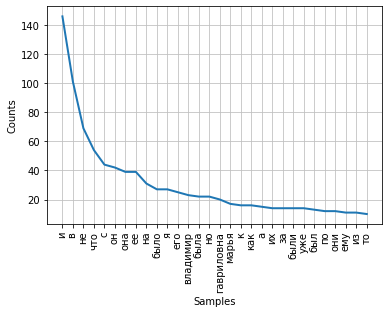

In [61]:
fdist.plot(30,cumulative=False)

## Удаление стоп-слов

In [62]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею'])

In [63]:
print(len(russian_stopwords))
# russian_stopwords

153


In [64]:
%%time
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]

Wall time: 6.98 ms


In [65]:
print(len(text_tokens))

2158


In [66]:
text = nltk.Text(text_tokens)

In [67]:
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)

[('владимир', 23),
 ('гавриловна', 20),
 ('марья', 17),
 ('поехал', 9),
 ('бурмин', 9),
 ('поминутно', 8),
 ('метель', 7),
 ('несколько', 6),
 ('сани', 6),
 ('владимира', 6)]

## Построение облака слов

- построить облако слов на тексте без лемматизации
- провести стемминг и лемматизацию. Построить график распред-я слов и облака для каждого случая
- закончить скрипт Базовые операции и записать видео
- проверить ф-ции NLTK Text на русском тексте
- продумать ещё раз план статьи "Частотный анализ русского текста на Python"

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
text_raw = " ".join(text)

In [72]:
wordcloud = WordCloud().generate(text_raw)

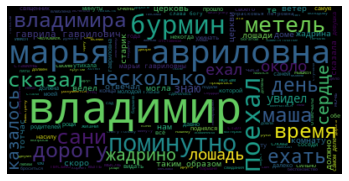

In [73]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
tl = list(text)
text_raw = " ".join(tl)

In [30]:
wordcloud = WordCloud().generate(text_raw)

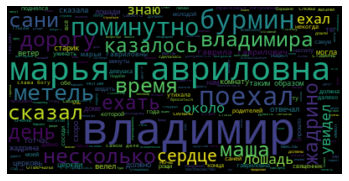

In [31]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
from pymystem3 import Mystem
mystem = Mystem() 

In [33]:
text_lem = mystem.lemmatize(text)

AttributeError: 'Text' object has no attribute 'splitlines'